# Exploração do Dataset FER-2013 (Formato de Pastas)

Este notebook explora o dataset que está organizado em pastas:
```
data/
├── train/
│   ├── angry/
│   ├── disgust/
│   ├── fear/
│   ├── happy/
│   ├── neutral/
│   ├── sad/
│   └── surprise/
└── test/
    └── ...
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
import random

# Configurar estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

%matplotlib inline

## 1. Configurar Caminhos

In [2]:
# Caminho para os dados
data_dir = Path('../data')
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

# Classes de emoções
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
emotion_labels_pt = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Neutro', 'Triste', 'Surpreso']

print(f"✓ Diretório de treino: {train_dir}")
print(f"✓ Diretório de teste: {test_dir}")
print(f"✓ Classes: {emotion_classes}")

✓ Diretório de treino: ../data/train
✓ Diretório de teste: ../data/test
✓ Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## 2. Analisar Distribuição das Classes

In [3]:
# Contar imagens em cada categoria
train_counts = {}
test_counts = {}

for emotion in emotion_classes:
    train_path = train_dir / emotion
    test_path = test_dir / emotion
    
    if train_path.exists():
        train_counts[emotion] = len(list(train_path.glob('*.jpg'))) + len(list(train_path.glob('*.png')))
    
    if test_path.exists():
        test_counts[emotion] = len(list(test_path.glob('*.jpg'))) + len(list(test_path.glob('*.png')))

print("Quantidade de imagens por emoção:")
print("\nTREINAMENTO:")
for emotion, count in train_counts.items():
    print(f"  {emotion:10s}: {count:5d} imagens")

print("\nTESTE:")
for emotion, count in test_counts.items():
    print(f"  {emotion:10s}: {count:5d} imagens")

print(f"\nTOTAL TREINO: {sum(train_counts.values())} imagens")
print(f"TOTAL TESTE: {sum(test_counts.values())} imagens")

Quantidade de imagens por emoção:

TREINAMENTO:
  angry     :  3995 imagens
  disgust   :   436 imagens
  fear      :  4097 imagens
  happy     :  7215 imagens
  neutral   :  4965 imagens
  sad       :  4830 imagens
  surprise  :  3171 imagens

TESTE:
  angry     :   958 imagens
  disgust   :   111 imagens
  fear      :  1024 imagens
  happy     :  1774 imagens
  neutral   :  1233 imagens
  sad       :  1247 imagens
  surprise  :   831 imagens

TOTAL TREINO: 28709 imagens
TOTAL TESTE: 7178 imagens


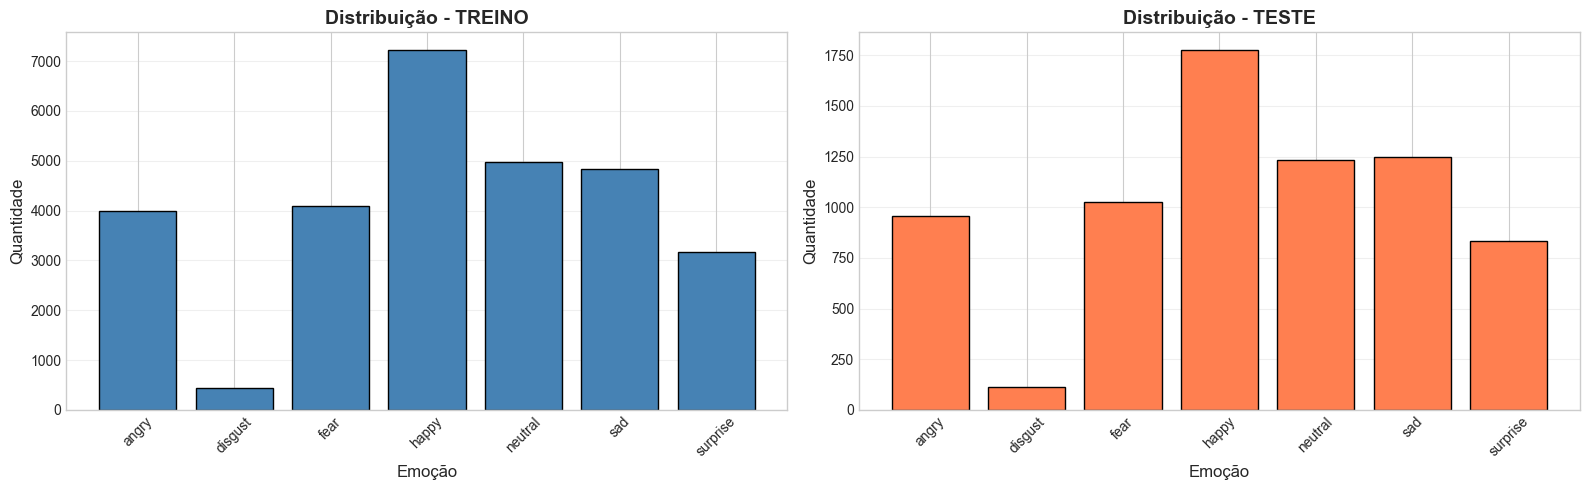

In [4]:
# Plotar distribuição
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Treino
emotions = list(train_counts.keys())
counts = list(train_counts.values())
ax1.bar(emotions, counts, color='steelblue', edgecolor='black')
ax1.set_title('Distribuição - TREINO', fontsize=14, fontweight='bold')
ax1.set_xlabel('Emoção', fontsize=12)
ax1.set_ylabel('Quantidade', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Teste
counts_test = list(test_counts.values())
ax2.bar(emotions, counts_test, color='coral', edgecolor='black')
ax2.set_title('Distribuição - TESTE', fontsize=14, fontweight='bold')
ax2.set_xlabel('Emoção', fontsize=12)
ax2.set_ylabel('Quantidade', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Visualizar Exemplos de Cada Emoção

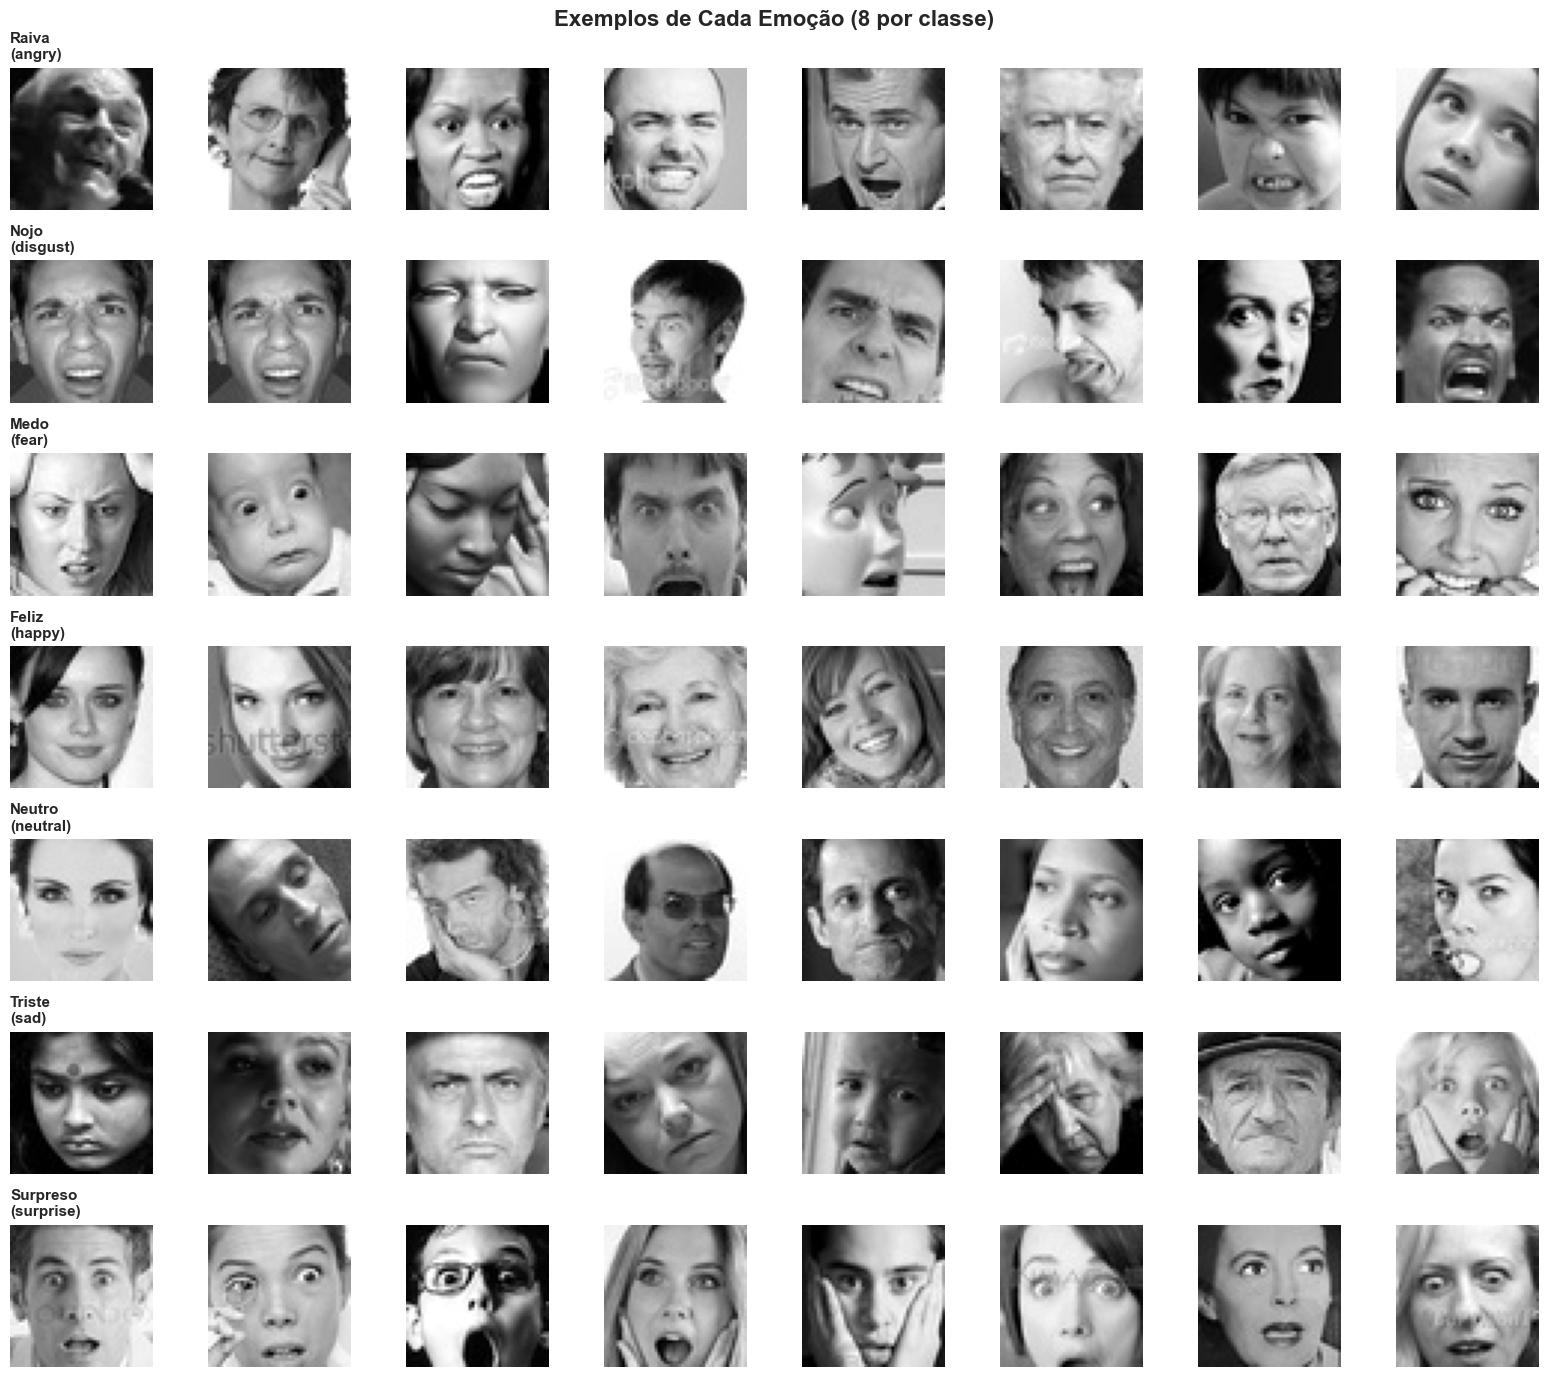

In [5]:
# Plotar exemplos de cada emoção
fig, axes = plt.subplots(7, 8, figsize=(16, 14))
fig.suptitle('Exemplos de Cada Emoção (8 por classe)', fontsize=16, fontweight='bold')

for emotion_idx, emotion in enumerate(emotion_classes):
    emotion_path = train_dir / emotion
    
    # Pegar todas as imagens da emoção
    image_files = list(emotion_path.glob('*.jpg')) + list(emotion_path.glob('*.png'))
    
    # Selecionar 8 aleatórias
    selected = random.sample(image_files, min(8, len(image_files)))
    
    for col_idx, img_path in enumerate(selected):
        # Carregar imagem
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        
        # Plotar
        ax = axes[emotion_idx, col_idx]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # Adicionar título na primeira coluna
        if col_idx == 0:
            ax.set_title(f"{emotion_labels_pt[emotion_idx]}\n({emotion})", 
                        fontsize=11, fontweight='bold', loc='left')

plt.tight_layout()
plt.show()

## 4. Analisar Características das Imagens

In [6]:
# Carregar algumas imagens para análise
sample_images = []
sample_size = 500  # Analisar 500 imagens aleatórias

for emotion in emotion_classes:
    emotion_path = train_dir / emotion
    image_files = list(emotion_path.glob('*.jpg')) + list(emotion_path.glob('*.png'))
    
    # Pegar algumas aleatórias
    selected = random.sample(image_files, min(sample_size // len(emotion_classes), len(image_files)))
    
    for img_path in selected:
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            sample_images.append(img)

sample_images = np.array(sample_images)

print(f"Analisando {len(sample_images)} imagens...")
print(f"\nEstatísticas dos Pixels:")
print(f"  Formato das imagens: {sample_images[0].shape}")
print(f"  Média: {sample_images.mean():.2f}")
print(f"  Desvio Padrão: {sample_images.std():.2f}")
print(f"  Mínimo: {sample_images.min()}")
print(f"  Máximo: {sample_images.max()}")

Analisando 497 imagens...

Estatísticas dos Pixels:
  Formato das imagens: (48, 48)
  Média: 131.61
  Desvio Padrão: 64.00
  Mínimo: 0
  Máximo: 255


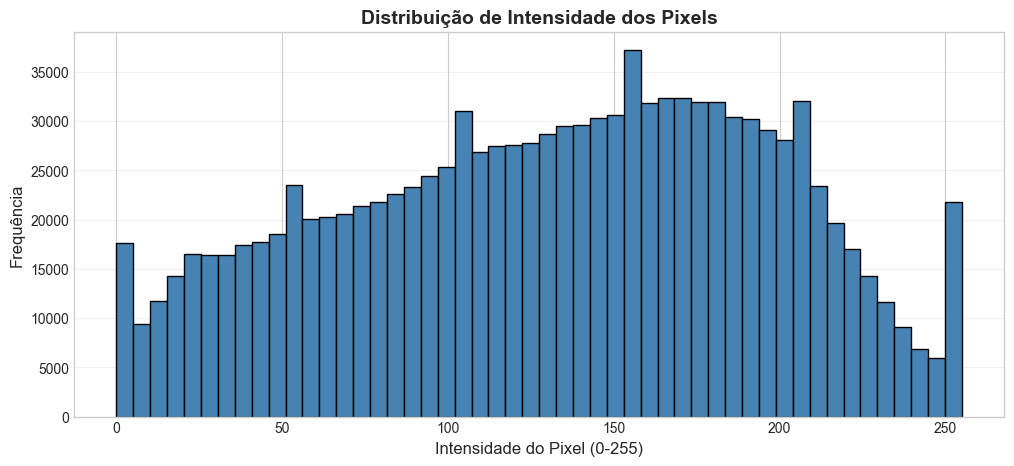

In [7]:
# Distribuição de intensidade dos pixels
plt.figure(figsize=(12, 5))
plt.hist(sample_images.flatten(), bins=50, edgecolor='black', color='steelblue')
plt.title('Distribuição de Intensidade dos Pixels', fontsize=14, fontweight='bold')
plt.xlabel('Intensidade do Pixel (0-255)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 5. Balanceamento das Classes

In [ ]:
# Verificar se há desbalanceamento
total_train = sum(train_counts.values())
expected_per_class = total_train / len(emotion_classes)

print("Análise de Balanceamento:")
print(f"\nTotal de imagens: {total_train}")
print(f"Esperado por classe (se balanceado): {expected_per_class:.0f}\n")

for emotion, count in train_counts.items():
    percentage = (count / total_train) * 100
    diff = count - expected_per_class
    print(f"{emotion:10s}: {count:5d} ({percentage:5.2f}%) - Diferença: {diff:+6.0f}")

# Identificar classe com menos amostras
min_class = min(train_counts, key=train_counts.get)
max_class = max(train_counts, key=train_counts.get)

print(f"\n⚠️ Classe com MENOS amostras: {min_class} ({train_counts[min_class]})")
print(f"✓ Classe com MAIS amostras: {max_class} ({train_counts[max_class]})")
print(f"\nRazão máx/mín: {train_counts[max_class] / train_counts[min_class]:.2f}x")

Análise de Balanceamento:

Total de imagens: 28709
Esperado por classe (se balanceado): 4101

angry     :  3995 (13.92%) - Diferença:   -106
disgust   :   436 ( 1.52%) - Diferença:  -3665
fear      :  4097 (14.27%) - Diferença:     -4
happy     :  7215 (25.13%) - Diferença:  +3114
neutral   :  4965 (17.29%) - Diferença:   +864
sad       :  4830 (16.82%) - Diferença:   +729
surprise  :  3171 (11.05%) - Diferença:   -930

⚠️ Classe com MENOS amostras: disgust (436)
✓ Classe com MAIS amostras: happy (7215)

Razão máx/mín: 16.55x
